Data 19/09/2024

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
import pickle

**Árvore de Decisão**  

Pergunta: Dado a Historia de credito, dívida, garantia e renda, qual o risco do cliente fazer um empréstimo?

In [7]:
from sklearn.tree import DecisionTreeClassifier

**base risco de crédito**

In [2]:
with open('risco_credito.pkl', 'rb') as file:
    X_risco_credito, y_risco_credito = pickle.load(file=file)

Base com aplicação do label enconder:  
- Historia de credito | Dívida | Garantia | Renda

In [5]:
X_risco_credito

array([[2, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 2],
       [1, 1, 1, 2],
       [1, 1, 0, 2],
       [2, 1, 1, 0],
       [2, 1, 0, 2],
       [0, 1, 1, 2],
       [0, 0, 0, 2],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 0, 1, 2],
       [2, 0, 1, 1]], dtype=object)

In [6]:
y_risco_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [11]:
# Criar arvore
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy')
# Encaixar os dados do algoritmo - Fazer o treinamento
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

DecisionTreeClassifier(criterion='entropy')

In [15]:
# Retorna a importância de cada atributo, o mais ganho de informação
arvore_risco_credito.feature_importances_
# Nesse caso, o critério de importância é na ordem:
#  X[3] = Renda 0.48, Historico, Divida, Garantia 0.03.

array([0.41391643, 0.06408636, 0.03885431, 0.4831429 ])

Visualizando a árvore no matplotlib

In [16]:
from sklearn import tree

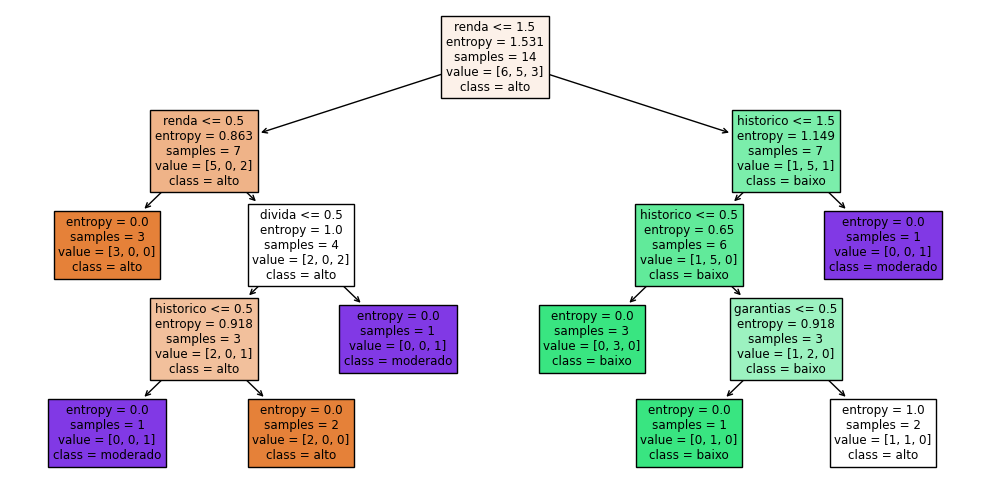

In [35]:
previsores: list[str] = ['historico', 'divida', 'garantias', 'renda']
classes_previsao: list[str] = arvore_risco_credito.classes_

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,5))
tree.plot_tree(arvore_risco_credito, feature_names=previsores,class_names=classes_previsao, filled=True);
plt.tight_layout()

In [1]:
# Previsão de dois clientes -> Historia | Dívida | Garantia | Renda
# Cliente 1: Boa | Alta | Nenhuma | > 35K ===== [0, 0, 1, 2]
# Cliente 2: Ruim | Alta | Adequada | < 15K ====  [2, 0, 0, 0]

cliente1 = [0, 0, 1, 2] # risco baixo 
cliente2 = [2, 0, 0, 0] # risco alto
clientes: list[list[int]] = [cliente1, cliente2]

previsoes = arvore_risco_credito.predict(X=clientes)

NameError: name 'arvore_risco_credito' is not defined

In [40]:
previsoes 

array(['baixo', 'alto'], dtype=object)